# imported a face mask data set for same cnn network and checked accuracy(Plotted graph)




In [ ]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import os,cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# loading data
dir = "/content/gdrive/MyDrive/Colab Notebooks/dataset"
category = ["with_mask", "without_mask"]
labels=[i for i in range(len(category))]
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
label_dict=dict(zip(category,labels)) #empty dictionary
img_size=122
data = []
target=[]

for categor in category:
    path = os.path.join(dir, categor)
    for img in os.listdir(path):
    	ipath = os.path.join(path, img)
    	image = cv2.imread(ipath)
    	gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    	resized=cv2.resize(gray,(img_size,img_size))
    	data.append(resized)
    	target.append(label_dict[categor])


[INFO] loading images...


In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
data=np.array(data)/255.0 #normalization
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
lb = LabelBinarizer()
labels = lb.fit_transform(target)
new_target = to_categorical(labels)

#from keras.utils import np_utils

#new_target=np_utils.to_categorical(target)

#Normalize inputs from (0.0 - 255.0) to (0.0 - 1.0)

In [ ]:
print(type(data))
print(data.dtype)
print(data.shape)
print(data[251].shape)
print(labels.shape)

<class 'numpy.ndarray'>
float64
(3839, 122, 122, 1)
(122, 122, 1)
(3839, 1)


In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test,y_train, y_test) = train_test_split(data, new_target,
	test_size=0.20, random_state=42)

#load data

#Create the model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(122,122, 1), padding='same', activation='relu'))
model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

#Compile model

In [ ]:
epochs = 10
lrate = 0.001
adam = tf.keras.optimizers.Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 122, 122, 32)      320       
                                                                 
 dropout (Dropout)           (None, 122, 122, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       7

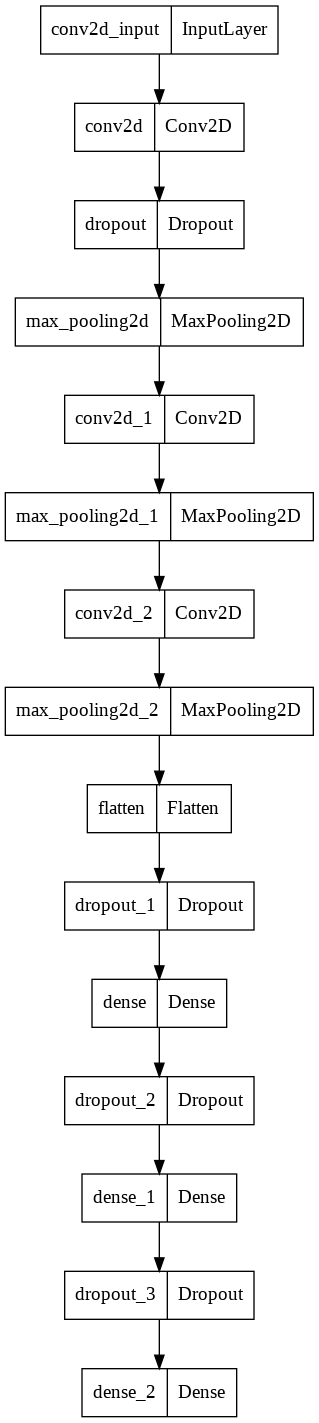

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
#from keras.callbacks import EarlyStopping,ModelCheckpoint
# simple early stopping
#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=3)

In [ ]:
pip install h5py

In [ ]:
mc = ModelCheckpoint('facemaskdetectionV1.h5', monitor='val_loss', mode='min', save_best_only=True)

#Fit the model

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1,callbacks=[mc])

Epoch 1/10
24/24 [==============================] - 109s 5s/step - loss: 0.7378 - accuracy: 0.5780 - val_loss: 0.5470 - val_accuracy: 0.7383
Epoch 2/10
24/24 [==============================] - 105s 4s/step - loss: 0.5169 - accuracy: 0.7483 - val_loss: 0.4505 - val_accuracy: 0.7917
Epoch 3/10
24/24 [==============================] - 104s 4s/step - loss: 0.4107 - accuracy: 0.8183 - val_loss: 0.3950 - val_accuracy: 0.8138
Epoch 4/10
24/24 [==============================] - 105s 4s/step - loss: 0.3044 - accuracy: 0.8688 - val_loss: 0.3075 - val_accuracy: 0.8802
Epoch 5/10
24/24 [==============================] - 104s 4s/step - loss: 0.2180 - accuracy: 0.9059 - val_loss: 0.2276 - val_accuracy: 0.9128
Epoch 6/10
24/24 [==============================] - 105s 4s/step - loss: 0.1387 - accuracy: 0.9459 - val_loss: 0.1998 - val_accuracy: 0.9271
Epoch 7/10
24/24 [==============================] - 107s 4s/step - loss: 0.0868 - accuracy: 0.9681 - val_loss: 0.2233 - val_accuracy: 0.9154
Epoch 8/10
24

#Model evaluation

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.36%


In [ ]:
predIdxs = model.predict(X_test, batch_size=128)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

In [ ]:

from sklearn.metrics import classification_report
# show a nicely formatted classification report
print(classification_report(y_test.argmax(axis=1), predIdxs,target_names=["mask","nomask"]))

              precision    recall  f1-score   support

        mask       0.96      0.85      0.90       405
      nomask       0.85      0.96      0.90       363

    accuracy                           0.90       768
   macro avg       0.91      0.91      0.90       768
weighted avg       0.91      0.90      0.90       768



In [ ]:
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 795 kB 9.8 MB/s 


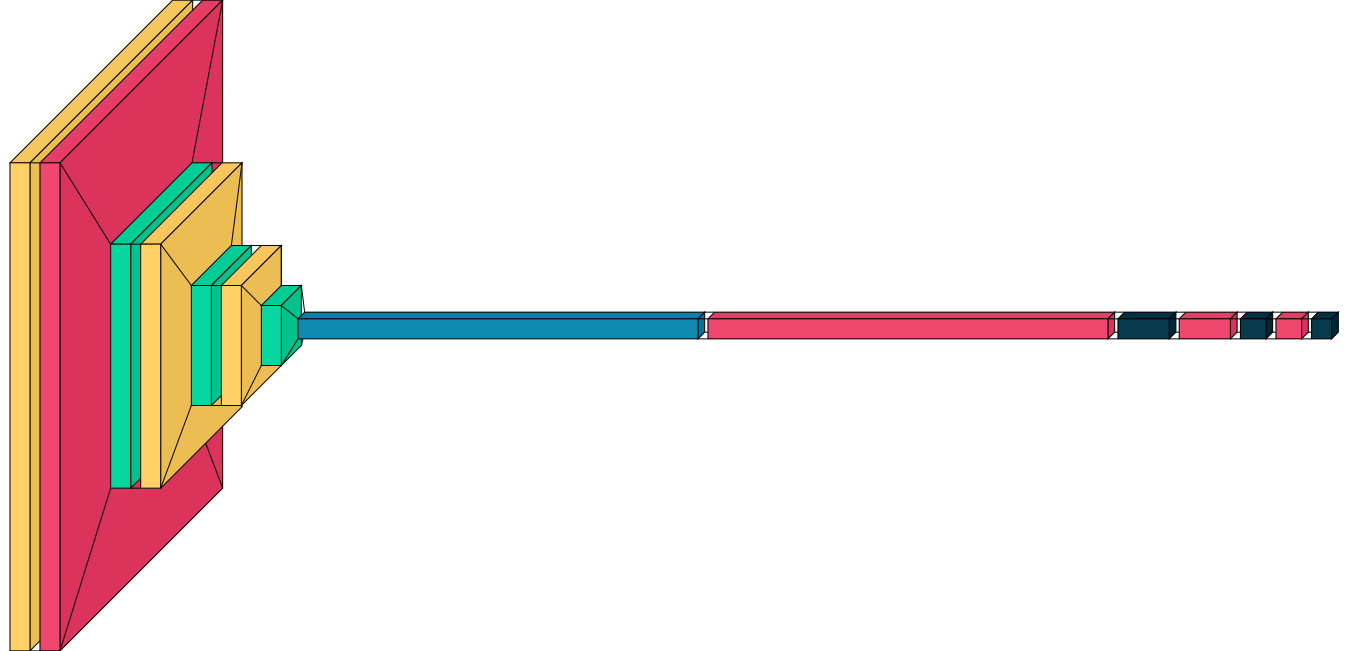

In [ ]:
# https://github.com/paulgavrikov/visualkeras

visualkeras.layered_view(model)

#ploting Training accuracy vs Testing accuracy

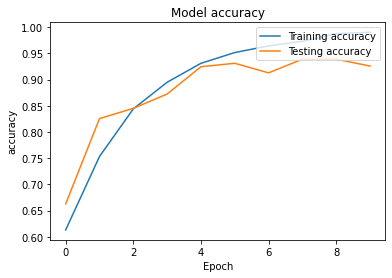

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.xlabel('Epoch')
plt.legend(['Training accuracy','Testing accuracy','Training loss','Testing loss'], loc='upper right')
plt.show()

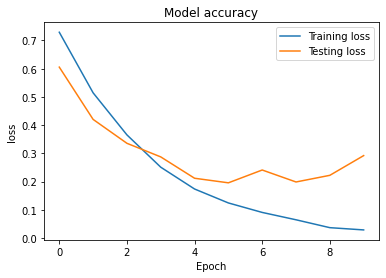

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Testing loss'], loc='upper right')
plt.show()